In [1]:
# from google.colab import drive
# drive.mount("/content/drive")

from zipfile import ZipFile
with ZipFile("./lc25000.zip") as zObject:
  zObject.extractall("dataset")

import os
colon_folder = "dataset/lung_colon_image_set/colon_image_sets/colon_n"
for i in os.listdir(colon_folder):
  os.remove(colon_folder + "/" + i)
os.rmdir(colon_folder)

lung_folder = "dataset/lung_colon_image_set/lung_image_sets/lung_n"
for i in os.listdir(lung_folder):
  os.remove(lung_folder + "/" + i)
os.rmdir(lung_folder)

In [2]:
import tensorflow.keras as keras
dataset = keras.utils.image_dataset_from_directory(
    "dataset",image_size = (64,64),batch_size=32, label_mode=None
)
dataset = dataset.map(lambda x:x/255.0)

c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

Found 15000 files.


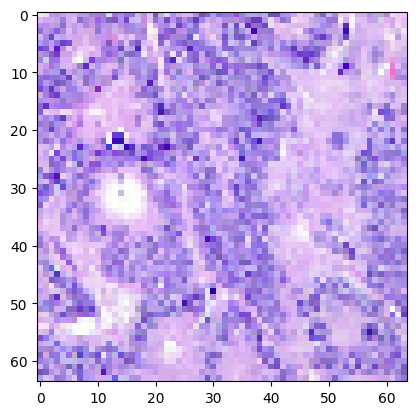

In [3]:
import matplotlib.pyplot as plt
for i in dataset:
  plt.imshow((i.numpy() * 255).astype("int32")[0])
  break

In [4]:
from keras import layers
discriminator = keras.Sequential([
    keras.Input(shape=(64,64,3)),
    layers.Conv2D(64, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(negative_slope=0.2),
    layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(negative_slope=0.2),
    layers.Conv2D(128, kernel_size=4, strides=2, padding="same"),
    layers.LeakyReLU(negative_slope=0.2),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(1, activation="sigmoid"),
])

discriminator.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 128)    │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,801 (1.54 MB)

 Trainable params: 404,801 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
input_latent_dim = 128

generator = keras.Sequential(
    [
        keras.Input(shape=(input_latent_dim,)),
        layers.Dense(8 * 8 * 128),
        layers.Reshape((8, 8, 128)),
        layers.Conv2DTranspose(128, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"),
        layers.LeakyReLU(negative_slope=0.2),
        layers.Conv2D(3, kernel_size=5, padding="same", activation="sigmoid"),
    ]
)

generator.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 8192)           │     1,056,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 32, 32, 256)    │       524,544 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 64, 64, 512)    │     2,097,664 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 64, 64, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 3)      │        38,403 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,979,651 (15.18 MB)

 Trainable params: 3,979,651 (15.18 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
opt_gen = keras.optimizers.Adam(1e-4)
opt_disc = keras.optimizers.Adam(1e-4)
loss_fn = keras.losses.BinaryCrossentropy()

import random
def random_rotation(latent_vector):
    angle = random.uniform(-0.2, 0.2)
    return latent_vector * (1 + angle)

def random_translation(latent_vector):
    translation_factor = random.uniform(-0.2, 0.2)
    return latent_vector + translation_factor

def random_scaling(latent_vector):
    scaling_factor = random.uniform(0.8, 1.2)
    return latent_vector * scaling_factor

def random_noise(latent_vector):
    noise_factor = tf.random.normal(shape=tf.shape(latent_vector), mean=0.0, stddev=0.1)
    return latent_vector + noise_factor

def augment_latent_vector(latent_vector):
    latent_vector = random_rotation(latent_vector)
    latent_vector = random_translation(latent_vector)
    latent_vector = random_scaling(latent_vector)
    latent_vector = random_noise(latent_vector)
    return latent_vector

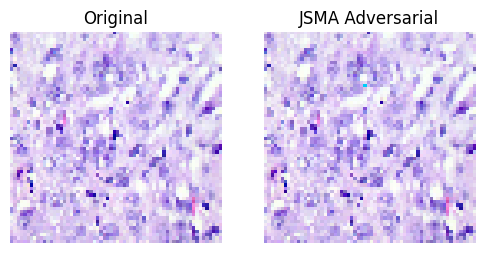

In [9]:
import tensorflow as tf
import numpy as np

def jsma_attack(model, image, target_label, theta=0.45, gamma=0.68):
    """
    JSMA for binary/multiclass Keras model.
    model        : model to attack (e.g., discriminator)
    image        : input image tensor [H, W, C] in [0,1]
    target_label : int (0 or 1 for binary GAN disc)
    theta        : change per pixel per step
    gamma        : fraction of total pixels to change
    """
    img_adv = tf.identity(image)
    num_features = np.prod(image.shape[:-1])
    max_iters = int(gamma * num_features)

    target_onehot = tf.one_hot([target_label], depth=model.output_shape[-1])

    for _ in range(max_iters):
        with tf.GradientTape() as tape:
            tape.watch(img_adv)
            preds = model(tf.expand_dims(img_adv, axis=0), training=False)
            loss = tf.keras.losses.binary_crossentropy(target_onehot, preds)

        grads = tape.gradient(loss, img_adv)
        saliency = tf.abs(grads)
        saliency_flat = tf.reshape(saliency, (-1,))
        idx = tf.argmax(saliency_flat)
        idx_unravel = np.unravel_index(idx.numpy(), img_adv.shape)

        delta = theta*tf.sign(grads[idx_unravel])
        img_adv = tf.tensor_scatter_nd_add(img_adv, [idx_unravel], [delta])

        img_adv = tf.clip_by_value(img_adv, 0, 1)

    return img_adv

for batch in dataset.take(1):
    real_img = batch[0]  
    break

adv_img = jsma_attack(discriminator, real_img, target_label=1)

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(real_img.numpy())
plt.title("Original")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(adv_img.numpy())
plt.title("JSMA Adversarial")
plt.axis("off")
plt.show()


In [10]:
# Get model predictions before and after attack
orig_pred = discriminator(tf.expand_dims(real_img, axis=0), training=False)
adv_pred = discriminator(tf.expand_dims(adv_img, axis=0), training=False)

print("Original prediction:", orig_pred.numpy())
print("Adversarial prediction:", adv_pred.numpy())

if np.round(orig_pred.numpy()) != np.round(adv_pred.numpy()):
    print("✅ Discriminator fooled by JSMA attack!")
else:
    print("❌ Discriminator not fooled.")


Original prediction: [[0.5523199]]
Adversarial prediction: [[0.55333304]]
❌ Discriminator not fooled.


Original prediction: [[0.5267516]]
Adversarial prediction: [[0.52712506]]
❌ Discriminator not fooled.


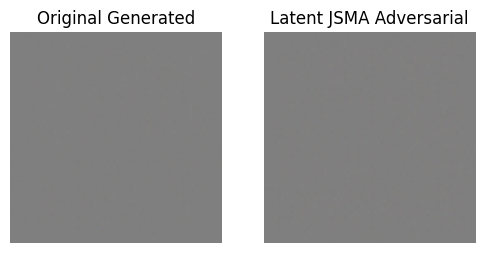

In [11]:
import tensorflow as tf
import numpy as np
import random

# JSMA on latent vector instead of image pixels
def jsma_attack_latent(generator, discriminator, z_init, target_label, theta=0.45, gamma=0.68):
    """
    JSMA for GAN latent space.
    generator     : GAN generator model
    discriminator : GAN discriminator model
    z_init        : latent vector tensor [latent_dim]
    target_label  : target class (0=fake, 1=real in binary GAN)
    theta         : change per latent feature per step
    gamma         : fraction of total latent features to change
    """
    z_adv = tf.identity(z_init)
    num_features = np.prod(z_init.shape)
    max_iters = int(gamma * num_features)

    target_onehot = tf.one_hot([target_label], depth=discriminator.output_shape[-1])

    for _ in range(max_iters):
        with tf.GradientTape() as tape:
            tape.watch(z_adv)
            generated_img = generator(tf.expand_dims(z_adv, axis=0), training=False)
            preds = discriminator(generated_img, training=False)
            loss = tf.keras.losses.binary_crossentropy(target_onehot, preds)

        grads = tape.gradient(loss, z_adv)
        saliency = tf.abs(grads)
        idx = tf.argmax(saliency)
        delta = theta * tf.sign(grads[idx])

        z_adv = tf.tensor_scatter_nd_add(
            z_adv,
            [[idx]],
            [delta]
        )

    return z_adv

# Example run:
latent_dim = input_latent_dim
z = tf.random.normal((latent_dim,))  # single latent vector

adv_z = jsma_attack_latent(generator, discriminator, z, target_label=1)

# Generate original and adversarial images
orig_img = generator(tf.expand_dims(z, axis=0), training=False)[0]
adv_img = generator(tf.expand_dims(adv_z, axis=0), training=False)[0]

# Predictions
orig_pred = discriminator(tf.expand_dims(orig_img, axis=0), training=False)
adv_pred = discriminator(tf.expand_dims(adv_img, axis=0), training=False)

print("Original prediction:", orig_pred.numpy())
print("Adversarial prediction:", adv_pred.numpy())

if np.round(orig_pred.numpy()) != np.round(adv_pred.numpy()):
    print("✅ Discriminator fooled by latent JSMA attack!")
else:
    print("❌ Discriminator not fooled.")

# Visual comparison
import matplotlib.pyplot as plt
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(orig_img.numpy())
plt.title("Original Generated")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(adv_img.numpy())
plt.title("Latent JSMA Adversarial")
plt.axis("off")
plt.show()
